In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook

from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# 6.8 Ejercicios

libro: time series forecasting (maning). ejercitacion practica de su metodología. cap 6. ULTIMO EJERCICIO (hecho 1 de 3)

Es momento de poner a prueba tus conocimientos y aplicar el procedimiento general de modelado con estos ejercicios. Las soluciones están disponibles en [GitHub](https://github.com/marcopeix/TimeSeriesForecastingInPython/tree/master/CH06).

---

## 6.8.1 Hacer Predicciones en el Proceso Simulado ARMA(1,1)

1. **Dividir los Datos**  
   - Reutiliza el proceso simulado ARMA(1,1).  
   - Divide los datos en conjuntos de entrenamiento y prueba:  
     - Asigna el 80% de los datos al conjunto de entrenamiento.  
     - Asigna el 20% restante al conjunto de prueba.

2. **Hacer Predicciones**  
   - Usa la función `rolling_forecast` para hacer predicciones con los siguientes métodos:  
     - Modelo ARMA(1,1).  
     - Método de la media.  
     - Método del último valor conocido.

3. **Graficar los Pronósticos**  
   - Visualiza las predicciones.

4. **Evaluar el Desempeño**  
   - Calcula el Error Cuadrático Medio (MSE) de cada método.  
   - ¿Cuál método tuvo el mejor desempeño?

---

## 6.8.2 Simular un Proceso ARMA(2,2) y Hacer Pronósticos

1. **Simular un Proceso ARMA(2,2)**  
   - Simula un proceso ARMA(2,2) estacionario utilizando la función `ArmaProcess` de `statsmodels` y este modelo:  
     \[
     y_t = 0.33y_{t-1} + 0.50y_{t-2} + 0.9\epsilon_{t-1} + 0.3\epsilon_{t-2}
     \]

   Código:
   ```python
   from statsmodels.tsa.arima_process import ArmaProcess
   import numpy as np
   
   np.random.seed(42)  # Para reproducibilidad
   ma2 = np.array([1, 0.9, 0.3])
   ar2 = np.array([1, -0.33, -0.5])
   ARMA_2_2 = ArmaProcess(ar2, ma2).generate_sample(nsample=10000)
   ```

2. **Graficar el Proceso Simulado**  
   - Visualiza el proceso generado.

3. **Probar Estacionariedad**  
   - Usa la prueba ADF para verificar si el proceso es estacionario.

4. **Dividir los Datos**  
   - Divide los datos en conjuntos de entrenamiento y prueba:  
     - Los últimos 200 pasos de tiempo conforman el conjunto de prueba.  
     - El resto conforma el conjunto de entrenamiento.

5. **Definir un Rango de Valores para \(p\) y \(q\)**  
   - Genera todas las combinaciones únicas de órdenes (\(p,q\)).

6. **Optimizar el Modelo ARMA**  
   - Usa la función `optimize_ARMA` para ajustar todos los modelos ARMA(\(p,q\)) únicos.  
   - Selecciona el modelo con el menor AIC.  
   - ¿El modelo ARMA(2,2) tiene el menor AIC?

7. **Seleccionar el Mejor Modelo**  
   - Según el AIC, selecciona el mejor modelo y almacena los residuos en una variable llamada `residuals`.

8. **Análisis Cualitativo de los Residuos**  
   - Usa el método `plot_diagnostics` para analizar los residuos.  
     - ¿El gráfico Q-Q muestra una línea recta en \(y = x\)?  
     - ¿El correlograma muestra coeficientes significativos?

9. **Análisis Cuantitativo de los Residuos**  
   - Aplica la prueba de Ljung-Box a los primeros 10 rezagos:  
     - ¿Todos los valores \(p\) obtenidos son mayores a 0.05?  
     - ¿Los residuos están correlacionados?

10. **Hacer Pronósticos**  
    - Usa la función `rolling_forecast` para hacer predicciones con:  
      - El modelo ARMA(\(p,q\)) seleccionado.  
      - El método de la media.  
      - El método del último valor conocido.

11. **Graficar los Pronósticos**  
    - Visualiza las predicciones.

12. **Evaluar el Desempeño**  
    - Calcula el MSE de cada método.  
    - ¿Cuál método tuvo el mejor desempeño?

---

## Resumen

El modelo de promedios móviles autorregresivos, denotado como ARMA(\(p,q\)), combina los modelos autorregresivos AR(\(p\)) y de promedios móviles MA(\(q\)).

### Características Principales:

- **Patrones de ACF y PACF:**  
  - Los procesos ARMA(\(p,q\)) muestran patrones de decaimiento o sinusoidales en los gráficos ACF y PACF.  
  - No se pueden usar para estimar los órdenes \(p\) y \(q\).

- **Procedimiento de Modelado General:**  
  - No se basa en gráficos ACF o PACF.  
  - Ajusta múltiples modelos ARMA(\(p,q\)) y realiza selección de modelos y análisis de residuos.

- **Selección de Modelos con AIC:**  
  - El criterio de información de Akaike (AIC) mide la pérdida de información de un modelo.  
  - Cuanto menor sea el AIC, mejor será el modelo.  
  - Es una medida relativa, no absoluta.

- **Análisis de Residuos:**  
  - Los residuos de un buen modelo deben aproximarse a ruido blanco:  
    - No correlacionados.  
    - Distribuidos normalmente.  
    - Independientes.  

- **Pruebas Gráficas y Cuantitativas:**  
  - **Gráfico Q-Q:**  
    - Compara la distribución de los residuos con una distribución normal teórica.  
    - Una línea recta en \(y = x\) indica similitud.  
  - **Prueba de Ljung-Box:**  
    - Determina si los residuos están correlacionados.  
    - Si los valores \(p\) son mayores a 0.05, los residuos no están correlacionados.

### Conceptos y Procedimientos Claves para Modelar con ARMA(p, q)

#### **Definición de ARMA(p, q):**
Un modelo ARMA combina:
- **AR(p)**: Autoregresivo de orden \(p\), que modela la relación lineal entre una observación y sus valores pasados.
- **MA(q)**: Promedio móvil de orden \(q\), que modela la relación con errores pasados.

El modelo ARMA es adecuado para **series estacionarias**, en las cuales las propiedades estadísticas (media y varianza) son constantes en el tiempo.

#### **Procedimientos Generales para ARMA:**

1. **Preparación de Datos:**
   - **Inspección inicial:** Graficar la serie temporal para detectar tendencias, estacionalidad o irregularidades.
   - **Estacionariedad:** Usar pruebas como **Dickey-Fuller aumentada (ADF)** para verificar estacionariedad. Si no es estacionaria, aplicar transformaciones como diferenciación.

2. **Diagnóstico Inicial con ACF y PACF:**
   - **ACF (Autocorrelation Function):** Identifica dependencias a diferentes rezagos.
   - **PACF (Partial Autocorrelation Function):** Evalúa la correlación entre observaciones con la influencia de intermedias eliminada.
   - Para procesos ARMA(p, q), los gráficos ACF y PACF suelen mostrar un **decaimiento sinusoidal** en lugar de cortes claros.

3. **Selección del Modelo (Criterio AIC):**
   - Generar una lista de combinaciones de \(p\) y \(q\) dentro de un rango razonable.
   - Ajustar modelos ARMA(p, q) para cada combinación y calcular el **Criterio de Información de Akaike (AIC)**.
   - Seleccionar el modelo con el AIC más bajo, considerando que balancea calidad de ajuste y simplicidad.

4. **Ajuste del Modelo:**
   - Usar librerías como `statsmodels` para ajustar el modelo seleccionado.
   - Ingresar coeficientes autoregresivos con signos opuestos al ajustar.

5. **Análisis de Residuos:**
   - Verificar que los residuos (errores) sean **ruido blanco**, es decir:
     - No correlacionados (usando prueba de **Ljung-Box**).
     - Distribuidos normalmente (gráfico **Q-Q** o histograma).
   - Si los residuos no cumplen estas condiciones, ajustar un nuevo modelo.

6. **Pronóstico:**
   - Generar predicciones basadas en el modelo ajustado.
   - Comparar con métodos básicos (último valor conocido o promedios) para validar el desempeño.

---

### **Identificación de Ordenes \(p\) y \(q\):**
Cuando ACF y PACF no son suficientes:
- Utilizar métodos como **Grid Search** para explorar combinaciones de parámetros.
- Validar con datos de prueba y evaluación cruzada.

---

### **Aplicación en un Caso Real:**
1. **Datos Simulados ARMA(1,1):**
   - Modelo: \( y_t = 0.33y_{t-1} + 0.9\epsilon_{t-1} + \epsilon_t \)
   - Generar datos con ruido blanco usando `statsmodels`.

2. **Diagnóstico:**
   - ACF y PACF con patrones sinusoidales confirman ARMA(1,1).
   - Prueba ADF indica estacionariedad.

3. **Selección y Evaluación:**
   - ARMA(1,1) se ajustó como modelo óptimo con el menor AIC.
   - Residuos mostraron independencia y normalidad.

4. **Pronósticos:**
   - Modelo aplicado a datos de ancho de banda.
   - Comparación con métodos básicos mostró mejor desempeño.

---

### **Ventajas del Procedimiento:**
- Reduce subjetividad de interpretar ACF y PACF.
- Utiliza criterios numéricos (AIC) para seleccionar el modelo.
- Incluye análisis robusto de residuos para garantizar calidad del ajuste.

### **Recomendaciones Finales:**
- Usar herramientas avanzadas como `auto_arima` para optimizar \(p\) y \(q\).
- Validar los resultados con series temporales reales y transformadas.


---

### **¿Qué es un modelo ARMA?**
Un modelo ARMA (AutoRegressive Moving Average) es una herramienta estadística que se usa para analizar **series temporales** y predecir valores futuros. Por ejemplo, si tienes datos sobre las temperaturas diarias, un modelo ARMA puede ayudarte a predecir la temperatura del próximo día.

El modelo tiene dos partes:
1. **Autorregresiva (AR)**: Usa los valores anteriores de la serie para predecir el siguiente valor.
2. **Media móvil (MA)**: Usa errores pasados (diferencias entre los valores reales y los predichos) para mejorar la predicción.

El modelo se llama **ARMA(p, q)**, donde:
- **p**: Número de valores anteriores que se usan en la parte AR.
- **q**: Número de errores pasados que se usan en la parte MA.

---

### **Parte 1: Modelo autorregresivo (AR)**
Imagina que queremos predecir el valor actual \( X_t \) usando los valores anteriores \( X_{t-1}, X_{t-2}, \dots \).

**Fórmula básica de AR(p):**  
\[ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t \]

- \( c \): Una constante.
- \( \phi_1, \phi_2, \dots, \phi_p \): Pesos que indican cuánta influencia tienen los valores pasados.
- \( \epsilon_t \): Un error aleatorio (como "ruido" en los datos).

Ejemplo: Si solo usamos el valor inmediatamente anterior (\( AR(1) \)):  
\[ X_t = c + \phi X_{t-1} + \epsilon_t \]  
Esto significa que el valor actual depende del anterior más un poco de azar.

**Condición importante:** Para que el modelo sea estable, el peso \( |\phi| \) debe ser menor que 1.

---

### **Parte 2: Modelo de media móvil (MA)**
Aquí usamos los **errores pasados** para ajustar la predicción. 

**Fórmula básica de MA(q):**  
\[ X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} \]

- \( \epsilon_t \): El error actual.
- \( \theta_1, \theta_2, \dots, \theta_q \): Pesos que indican cuánto afectan los errores pasados.

Ejemplo: Si usamos solo el error anterior (\( MA(1) \)):  
\[ X_t = \epsilon_t + \theta_1 \epsilon_{t-1} \]  
Esto significa que el valor actual corrige el error pasado.

---

### **Unión: Modelo ARMA(p, q)**
El modelo ARMA combina ambas partes: usa valores pasados (\( AR \)) y errores pasados (\( MA \)) para predecir el futuro.

**Fórmula de ARMA(p, q):**  
\[ X_t = c + \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} \]

---

### **Ejemplo práctico**
Supongamos que quieres predecir las ventas de una tienda:
1. La parte AR usa las ventas de días anteriores (por ejemplo, "si las ventas de ayer fueron altas, es probable que hoy también lo sean").
2. La parte MA corrige predicciones pasadas basándose en errores ("si predije mal ayer, ajustaré mi predicción de hoy").

---

### **Puntos clave**
1. El modelo ARMA es útil para datos que tienen patrones en el tiempo.
2. Antes de usarlo, los datos deben ser **estacionarios** (sus patrones no cambian con el tiempo).
3. Si los datos no son estacionarios, se usa un modelo más avanzado llamado **ARIMA**.


# <> Ejercicio del libro que voy a hacer:

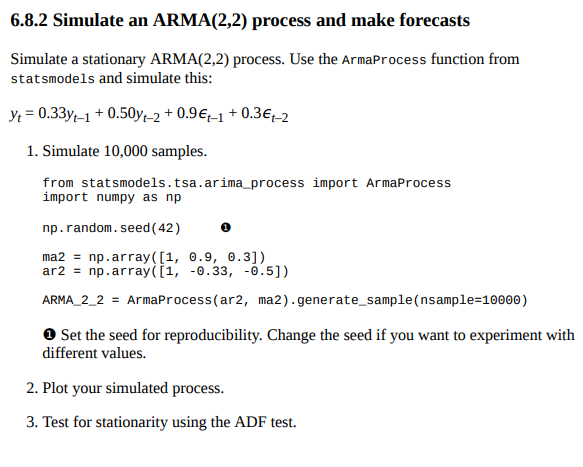
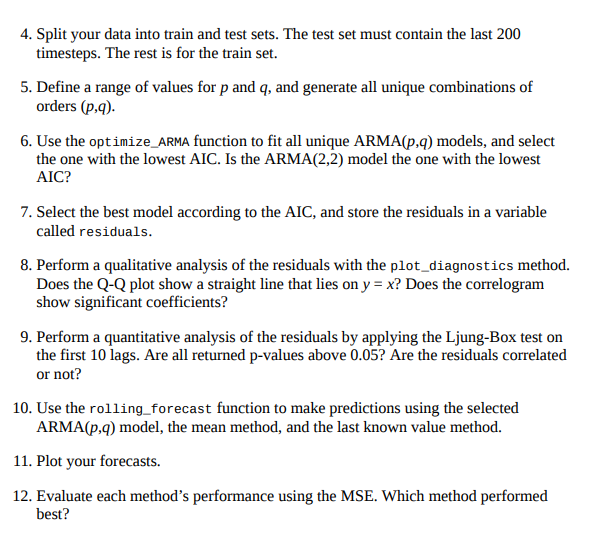

# Resolución: 

In [1]:
# simulamos el proceso de ARMA(2,2)
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(0)

ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, -0.33, -0.5])

AR= ArmaProcess(ar2,ma2).generate_sample(nsample = 10000)

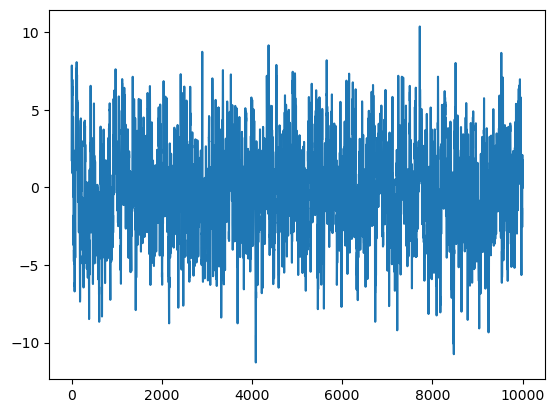

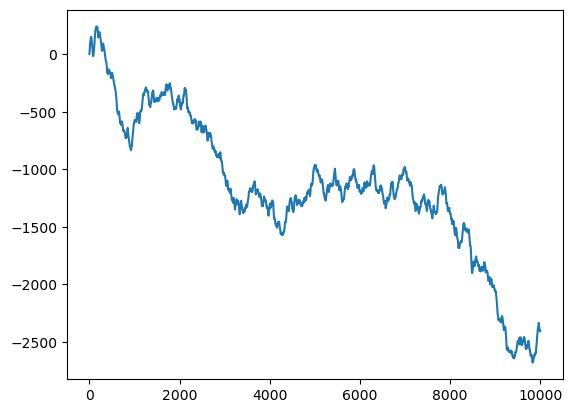

In [2]:
# plot your smiulated process
AR
import matplotlib.pyplot as plt
plt.plot(AR)
plt.show()
plt.plot(AR.cumsum())
plt.show()

In [6]:
# 3. Test for stationarity using the ADF test

from statsmodels.tsa.stattools import adfuller
adf = adfuller(AR)
adf

(-21.025844501391088,
 0.0,
 6,
 9993,
 {'1%': -3.431004556246501,
  '5%': -2.8618292749021865,
  '10%': -2.5669239758928017},
 28015.533085281775)

In [7]:
# stationary muchachos ?? respuesta: ño.
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')

ADF Statistic: -21.025844501391088
p-value: 0.0


menor que 0.05 de nivel de significancia

Resultado de la prueba ADF: 

El p-valor tan bajo indica que rechazas la hipótesis nula de que la serie temporal tiene una raíz unitaria (es decir, que la serie no es estacionaria). En otras palabras, la prueba sugiere que esta serie es estacionaria.

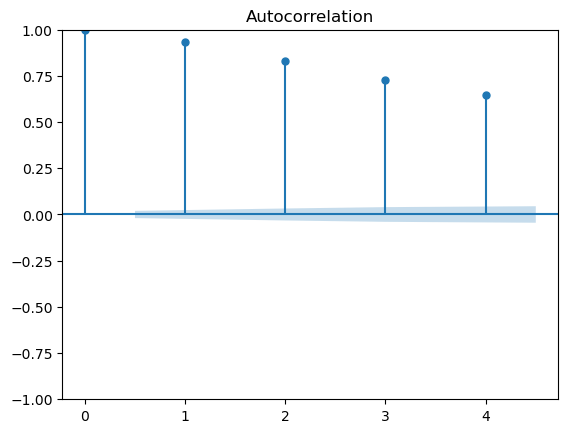

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(AR, lags=4)
plt.show()  

In [32]:
# 4. Split your data into train and test sets. The test 
# 200 timesteps
particion = int(AR.shape[0]*0.8)

train = AR[:9800]
test = AR[9800:10000]

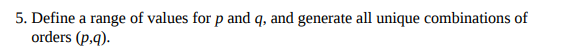

In [41]:

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
            
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'ARMA':
        pred_ARMA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(1,0,1))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
            
        return pred_ARMA

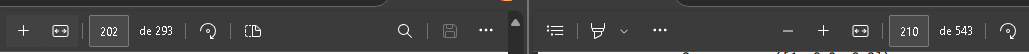

In [40]:
from typing import Union

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [43]:
ps = range(1, 4, 1)
qs = range(1, 4, 1)

order_list = list(product(ps, qs))
result_df = optimize_ARMA(train, order_list)
result_df

  0%|          | 0/9 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(2, 2)",27560.134071
1,"(2, 3)",27561.573591
2,"(3, 2)",27561.640679
3,"(3, 3)",27563.886577
4,"(1, 3)",27577.454887
5,"(1, 2)",27623.178909
6,"(3, 1)",27642.619764
7,"(2, 1)",27709.381814
8,"(1, 1)",27839.118581


In [51]:
value = result_df.AIC.min()
result_df[result_df['AIC'] == value]

,"(p,q)",AIC
0,"(2, 2)",27560.134071


El procedimiento que se describe es una **optimización para seleccionar los parámetros \(p\) y \(q\)** del modelo ARMA basado en el criterio de información de Akaike (**AIC**). 

---

### **¿Por qué se generan \(p\) y \(q\)?**
En un modelo ARMA(p, q):  
- **\(p\)**: Indica el número de términos autoregresivos, o cuántos valores pasados de la serie se consideran para predecir el actual.  
- **\(q\)**: Representa el número de términos de promedio móvil, o cuántos errores pasados afectan al valor actual.  

Determinar el mejor \(p\) y \(q\) no es trivial. Existen combinaciones posibles, y necesitamos probarlas para identificar cuál produce el modelo más adecuado. Por eso, se crea una lista con todas las combinaciones de \(p\) y \(q\) posibles usando un rango definido.

---

### **¿Qué es el AIC?**  
El **Akaike Information Criterion (AIC)** es una métrica que mide la calidad relativa de un modelo estadístico en términos de:  
1. **Bondad de ajuste** (qué tan bien explica el modelo los datos).  
2. **Penalización por complejidad** (para evitar sobreajustes).

Fórmula simplificada:  
\[
\text{AIC} = -2 \ln(L) + 2k
\]
- \(L\): La verosimilitud del modelo, que mide qué tan probable es que el modelo genere los datos observados.  
- \(k\): Número de parámetros en el modelo (por ejemplo, los coeficientes AR y MA).

**Un AIC más bajo indica un modelo mejor**, ya que significa que el modelo equilibra adecuadamente el ajuste y la complejidad.

---

### **¿Qué significa el resultado?**  
La tabla de resultados tiene dos columnas:  
1. **\((p, q)\)**: Las combinaciones probadas de los parámetros.  
2. **AIC**: El valor del AIC calculado para cada combinación.

Ejemplo de la tabla:  

| (p, q) | AIC           |  
|--------|---------------|  
| (2, 2) | 27560.13      |  
| (2, 3) | 27561.57      |  
| (3, 2) | 27561.64      |  

- La combinación \((2, 2)\) tiene el AIC más bajo. Esto significa que, según el criterio de Akaike, **ARMA(2, 2)** es el modelo más adecuado entre los evaluados.

---

### **¿Por qué hacemos todo esto?**
1. **El objetivo final es elegir el mejor modelo ARMA para los datos.**  
   Un modelo con buenos \(p\) y \(q\) captura las características de la serie temporal (tendencias, patrones) sin sobreajustarse.

2. **Evitar sobreajuste y subajuste:**  
   - Si \(p\) y \(q\) son demasiado grandes, el modelo puede ajustarse demasiado bien a los datos y perder capacidad de generalización.  
   - Si son demasiado pequeños, el modelo no captura la estructura de la serie.

---

### **¿Cómo elijo \(p\) y \(q\)?**
El criterio principal es:  
- **Seleccionar la combinación de \(p\) y \(q\) con el AIC más bajo.**  
En este caso, sería \((p=2, q=2)\), ya que tiene el menor AIC: **27560.13**.

---

### **Resumen**
Este proceso nos permite:  
1. Probar diferentes combinaciones de \(p\) y \(q\).  
2. Evaluar cuál modelo explica mejor la serie temporal sin ser innecesariamente complejo.  
3. Seleccionar el modelo ARMA con el menor AIC como el más adecuado para realizar predicciones confiables.  


In [53]:
# 8) usaremos el (2,2)

"""
El modelo SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables) es una extensión del modelo ARIMA
que incluye componentes estacionales y permite incorporar variables exógenas (variables adicionales que afectan la serie temporal).

en este caso aplicamos solo factores p y q. de los rangos ya vistos
"""
model = SARIMAX(train, order=(2,0,2), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9800
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -13775.067
Date:                Wed, 04 Dec 2024   AIC                          27560.134
Time:                        23:44:12   BIC                          27596.085
Sample:                             0   HQIC                         27572.315
                               - 9800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3705      0.044      8.397      0.000       0.284       0.457
ar.L2          0.4526      0.041     11.073      0.000       0.373       0.533
ma.L1          0.8629      0.043     20.283      0.0

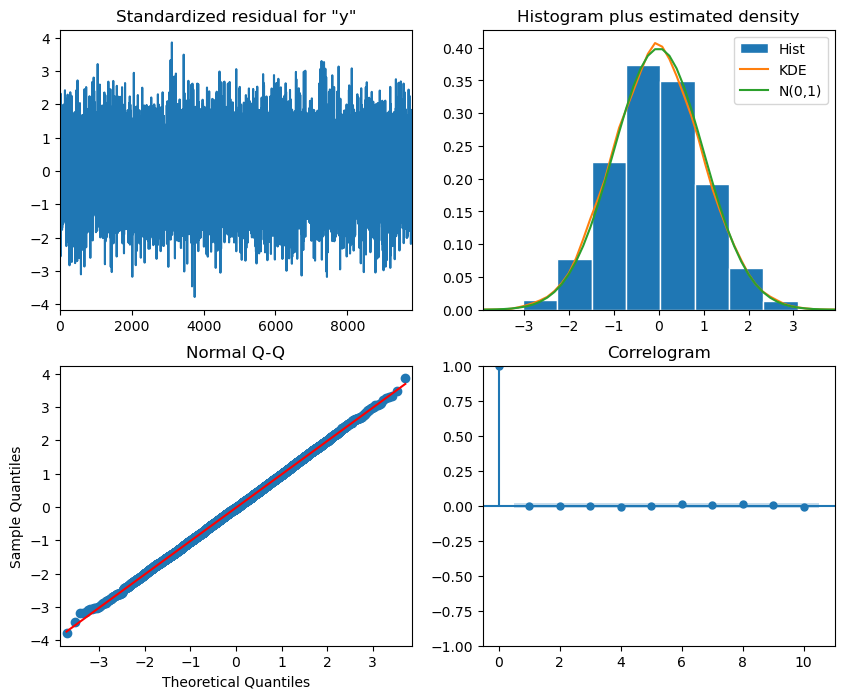

In [54]:
# 9) 

model_fit.plot_diagnostics(figsize=(10, 8));

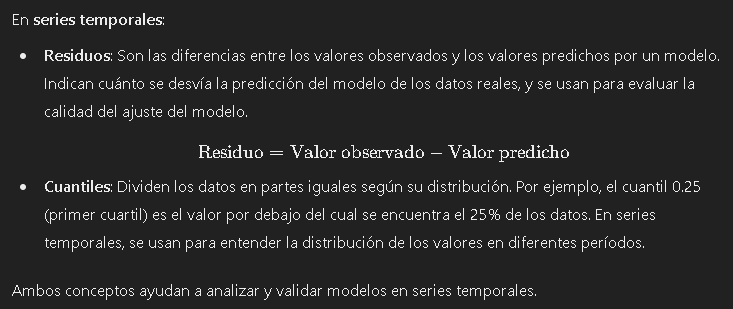

---

### **Gráfico 1: "Standardized residual for 'y'" (arriba a la izquierda)**
Este gráfico muestra los **residuos estandarizados** del modelo, es decir, las diferencias entre los valores predichos por el modelo y los valores reales, normalizadas (ajustadas para que tengan media 0 y varianza 1).

**Qué buscar:**  
- **Un buen modelo** tendrá residuos que parecen un ruido aleatorio, sin patrones visibles.  
- **Interpretación:** Los residuos en este caso se ven distribuidos de forma uniforme y sin patrones evidentes, lo cual es **un buen indicio de que el modelo está ajustado correctamente.**

---

### **Gráfico 2: Histograma y densidad (arriba a la derecha)**
Este gráfico compara la distribución de los residuos con una distribución normal teórica (\(N(0,1)\)) mediante un histograma y una curva de densidad.

**Qué buscar:**  
- Si los residuos siguen una distribución normal, el histograma y la curva azul (densidad empírica) deberían ajustarse bien a la curva verde (normal teórica).  

**Interpretación:**  
- Aquí los residuos parecen seguir bastante bien la curva normal, lo cual es un buen indicio de que el modelo está capturando correctamente la estructura de la serie temporal.  
- Sin embargo, cualquier pequeña desviación en las colas (extremos) podría indicar un problema menor, pero no crítico.

---

### **Gráfico 3: Normal Q-Q Plot (abajo a la izquierda)**  
Este gráfico compara los cuantiles observados de los residuos con los cuantiles teóricos de una distribución normal.

**Qué buscar:**  
- Si los puntos caen cerca de la línea roja (y=x), los residuos siguen una distribución normal.  
- Desviaciones en las colas (extremos del gráfico) indicarían que los residuos no son perfectamente normales.

**Interpretación:**  
- Los puntos están alineados casi perfectamente con la línea roja, lo que **refuerza la idea de que los residuos son aproximadamente normales.** Esto es positivo porque valida uno de los supuestos del modelo.

---

### **Gráfico 4: Correlograma (abajo a la derecha)**  
Este gráfico muestra la autocorrelación de los residuos en diferentes retardos (lags).

**Qué buscar:**  
- En un buen modelo, los residuos deben ser independientes, es decir, no deben mostrar correlaciones significativas entre ellos.  
- Las barras del correlograma (coeficientes de autocorrelación) deben estar dentro de las bandas de confianza (líneas azules).  

**Interpretación:**  
- Aquí todas las barras están dentro de las bandas de confianza, lo que sugiere que **los residuos no están correlacionados** y son efectivamente "ruido blanco". Esto es un excelente resultado.

---

### **Conclusión general**
1. **Modelo adecuado:**  
   - Los residuos parecen ruido blanco: no hay patrones visibles.  
   - Los residuos siguen una distribución normal (validado por el histograma y el Q-Q plot).  
   - No hay correlaciones significativas entre los residuos (validado por el correlograma).  

2. **Confianza en el modelo:**  
   Con base en estos gráficos de diagnóstico, el modelo ARMA(2,2) parece ser una buena elección para la serie temporal que estás analizando. Puedes usar este modelo para realizar pronósticos confiables.

---

In [55]:
residuals = model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

lb_pvalue



El modelo **ARMA(p, q)** es una combinación de dos modelos fundamentales en series temporales: el **modelo autoregresivo (AR(p))** y el **modelo de promedio móvil (MA(q))**:

---

### **Conceptos básicos**  
1. **AR(p) (Autoregressive model)**:  
   - Modela la relación entre un valor actual y los valores pasados de la serie.  
   - \( X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t \).  
   - Depende de los parámetros \(p\) y los coeficientes \(\phi\).

2. **MA(q) (Moving Average model)**:  
   - Modela la relación entre un valor actual y los errores pasados (ruido blanco).  
   - \( X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} \).  
   - Depende de los parámetros \(q\) y los coeficientes \(\theta\).

3. **ARMA(p, q)**:  
   - Combina los conceptos AR y MA:  
     \( X_t = \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} \).  
   - \(p\): Orden del componente AR.  
   - \(q\): Orden del componente MA.

---

### **Identificación del modelo**  
1. **ACF (Autocorrelation Function)** y **PACF (Partial Autocorrelation Function)**:  
   - Ambas pueden mostrar patrones que indican la posible presencia de \(p\) y \(q\). Sin embargo, en ARMA, estos gráficos tienden a mostrar patrones que se desvanecen o sinusoidales, lo que los hace menos útiles para determinar directamente \(p\) y \(q\).

2. **AIC (Akaike Information Criterion)**:  
   - Se usa para seleccionar el mejor modelo entre varios candidatos.  
   - Fórmula básica: \( \text{AIC} = -2 \ln(L) + 2k \), donde \(L\) es la verosimilitud y \(k\) es el número de parámetros.  
   - Un menor AIC indica un mejor modelo.

---

### **Evaluación del modelo**  
1. **Análisis de residuos**:  
   - Los residuos deben comportarse como **ruido blanco** (independientes, sin correlación, normalmente distribuidos).  
   - Si esto no se cumple, el modelo necesita ajustes.

2. **Gráficos y pruebas clave**:  
   - **Q-Q Plot**: Compara los residuos con una distribución normal. Una línea recta indica normalidad.  
   - **Prueba de Ljung-Box**: Verifica si los residuos están correlacionados.  
     - \(H_0\): Los datos son independientes y no correlacionados.  
     - Si \(p\)-valor > 0.05, no se rechaza \(H_0\) (los residuos son ruido blanco).

---

### **Flujo típico para modelar ARMA**  
1. **Estacionarizar la serie**: Asegúrate de que los datos son estacionarios. Si no lo son, usa transformaciones como diferenciación.  
2. **Determinar \(p\) y \(q\)**: Usa combinaciones de valores y selecciona el mejor modelo con base en el AIC.  
3. **Ajustar el modelo**: Entrena varios modelos ARMA(p, q).  
4. **Evaluar el modelo**: Analiza los residuos usando gráficos (ACF, PACF, Q-Q) y pruebas estadísticas.  
5. **Validación**: Verifica que los residuos sean ruido blanco.

--- 